In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam


print(tf.__version__)

2.12.0


In [ ]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [ ]:
d = df
x = d.drop(['target'],axis=1)
y = d['target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(455, 4)

In [ ]:
x_train = x_train.reshape(455,4,1)
x_test = x_test.reshape(114, 4, 1)

50 epochs

In [ ]:
epochs = 50
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (4,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 batch_normalization (BatchN  (None, 3, 32)            128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3, 32)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 batch_normalization_1 (Batc  (None, 2, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 2, 64)             0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 33ms/step - loss: 1.1805 - accuracy: 0.4286 - val_loss: 0.6903 - val_accuracy: 0.5877
Epoch 2/50
15/15 [==============================] - 0s 6ms/step - loss: 1.0266 - accuracy: 0.4901 - val_loss: 0.6932 - val_accuracy: 0.4123
Epoch 3/50
15/15 [==============================] - 0s 6ms/step - loss: 1.1059 - accuracy: 0.4593 - val_loss: 0.6946 - val_accuracy: 0.4123
Epoch 4/50
15/15 [==============================] - 0s 6ms/step - loss: 0.9574 - accuracy: 0.5099 - val_loss: 0.6958 - val_accuracy: 0.4123
Epoch 5/50
15/15 [==============================] - 0s 6ms/step - loss: 0.9237 - accuracy: 0.5231 - val_loss: 0.6967 - val_accuracy: 0.4123
Epoch 6/50
15/15 [==============================] - 0s 6ms/step - loss: 0.8201 - accuracy: 0.5714 - val_loss: 0.6973 - val_accuracy: 0.4123
Epoch 7/50
15/15 [==============================] - 0s 5ms/step - loss: 0.8775 - accuracy: 0.5363 - val_loss: 0.6973 - val_accuracy: 0.4211
Epoch 8/50
15/15 [=

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

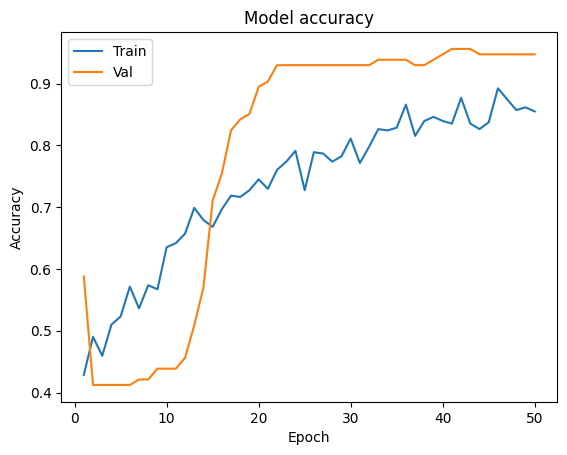

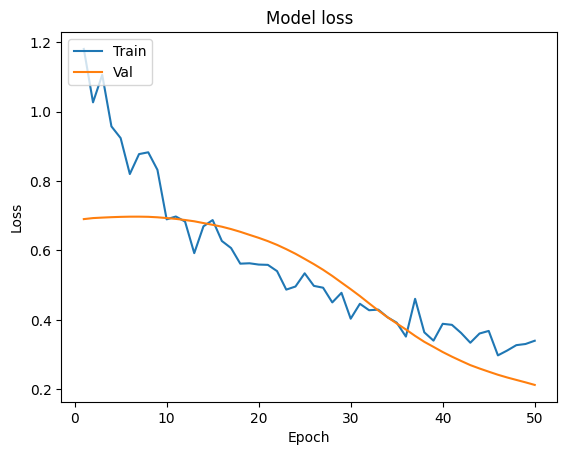

In [ ]:
plot_learningCurve(history, epochs)

45 epochs


In [ ]:
epochs = 45
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (4,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/45
15/15 [==============================] - 5s 52ms/step - loss: 0.9668 - accuracy: 0.5473 - val_loss: 0.6893 - val_accuracy: 0.6053
Epoch 2/45
15/15 [==============================] - 0s 9ms/step - loss: 0.9013 - accuracy: 0.5868 - val_loss: 0.6871 - val_accuracy: 0.5877
Epoch 3/45
15/15 [==============================] - 0s 12ms/step - loss: 0.9569 - accuracy: 0.5626 - val_loss: 0.6850 - val_accuracy: 0.5877
Epoch 4/45
15/15 [==============================] - 0s 12ms/step - loss: 0.8194 - accuracy: 0.6154 - val_loss: 0.6827 - val_accuracy: 0.5877
Epoch 5/45
15/15 [==============================] - 0s 17ms/step - loss: 0.8611 - accuracy: 0.5978 - val_loss: 0.6803 - val_accuracy: 0.5877
Epoch 6/45
15/15 [==============================] - 0s 9ms/step - loss: 0.7711 - accuracy: 0.6527 - val_loss: 0.6779 - val_accuracy: 0.5877
Epoch 7/45
15/15 [==============================] - 0s 10ms/step - loss: 0.7893 - accuracy: 0.6374 - val_loss: 0.6755 - val_accuracy: 0.5877
Epoch 8/45
15/1

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

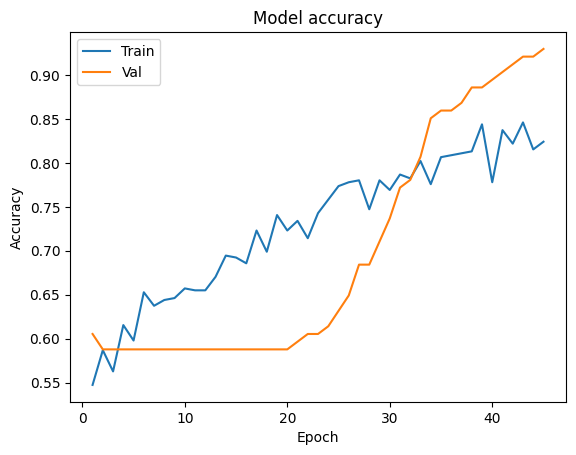

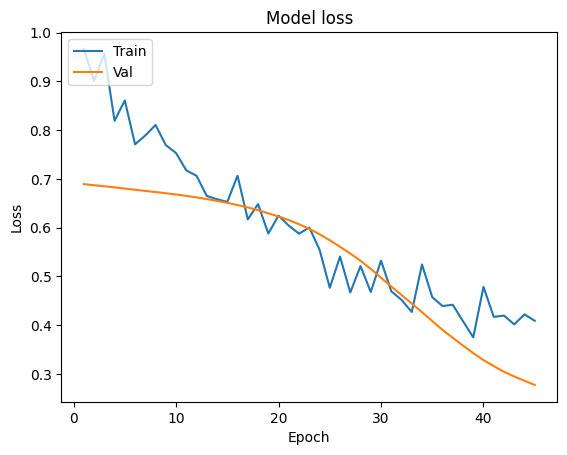

In [ ]:
plot_learningCurve(history, epochs)

40 epochs

In [ ]:
epochs = 40
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (4,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/40
15/15 [==============================] - 4s 31ms/step - loss: 1.0597 - accuracy: 0.5165 - val_loss: 0.6994 - val_accuracy: 0.3333
Epoch 2/40
15/15 [==============================] - 0s 8ms/step - loss: 1.0095 - accuracy: 0.5385 - val_loss: 0.7050 - val_accuracy: 0.4123
Epoch 3/40
15/15 [==============================] - 0s 7ms/step - loss: 0.9196 - accuracy: 0.5846 - val_loss: 0.7091 - val_accuracy: 0.4123
Epoch 4/40
15/15 [==============================] - 0s 8ms/step - loss: 0.8631 - accuracy: 0.5846 - val_loss: 0.7130 - val_accuracy: 0.4123
Epoch 5/40
15/15 [==============================] - 0s 9ms/step - loss: 0.8147 - accuracy: 0.6198 - val_loss: 0.7160 - val_accuracy: 0.4123
Epoch 6/40
15/15 [==============================] - 0s 8ms/step - loss: 0.7619 - accuracy: 0.6484 - val_loss: 0.7188 - val_accuracy: 0.4123
Epoch 7/40
15/15 [==============================] - 0s 8ms/step - loss: 0.9013 - accuracy: 0.5736 - val_loss: 0.7206 - val_accuracy: 0.4123
Epoch 8/40
15/15 [=

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

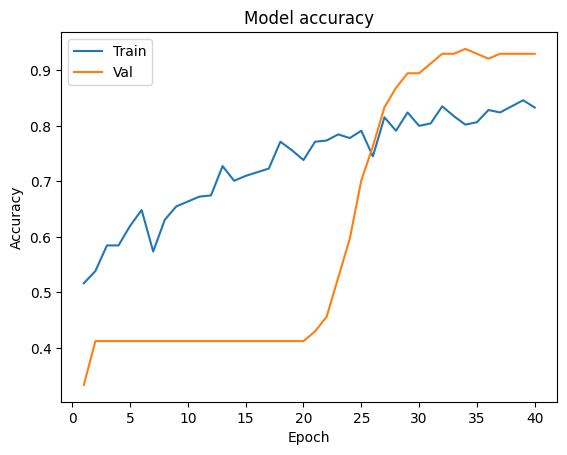

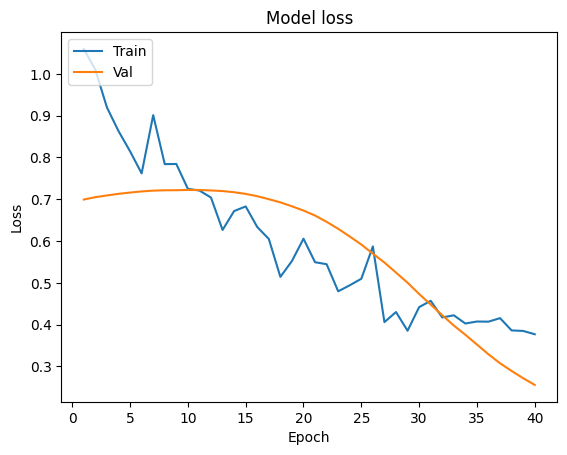

In [ ]:
plot_learningCurve(history, epochs)